<a href="https://www.kaggle.com/code/rakeshrk07/churnpredictio-eda-logisticregression-ann-86-acc?scriptVersionId=162083349" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-churn/train.csv
/kaggle/input/bank-churn/test.csv


In [2]:
df_train=pd.read_csv('/kaggle/input/bank-churn/train.csv')
df_train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [3]:
df_train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df_train.duplicated().sum()

0

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
df_train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [7]:
df_train.drop(columns=['id','CustomerId','Surname'],inplace=True)

In [8]:
df_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


### ***Data Visualization***

In [9]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

* ***I will use plotly for most of the plots .***

* ***Plotly is a data visualization library that allows users to create interactive and dynamic plots in Python, R, and Julia. It provides a high-level interface for creating a wide variety of charts and graphs, including line charts, bar charts, scatter plots, heatmaps, and more.***

* ***You can interact with the plot by using the tools shown in top right corner of each plot. Just head to the top right corner of the plot to explore and play around with it. Note- use reset index to bring back the plot in normal form***

In [10]:
Exited_count=df_train['Exited'].value_counts().reset_index()
Exited_count['Exited']=Exited_count['Exited'].map({0:'Left',1:'Did not left'})
Exited_count

,Exited,count
0,Left,130113
1,Did not left,34921


In [11]:
fig=px.pie(Exited_count,names='Exited',values='count',title='Exited  Count')
fig.show(render='iframe')

* 1 means left 
* 0 means not left

In [12]:

fig=px.pie(df_train['Geography'].value_counts().reset_index()
           ,names='Geography',values='count',title='Geographical Distribution')
fig.show(render='iframe')

In [13]:
Geography_Exited_groupby=df_train.groupby(by=['Geography','Exited']).size().reset_index()
Geography_Exited_groupby = Geography_Exited_groupby.rename(columns={0: 'Count'})
Geography_Exited_groupby['Exited']=Geography_Exited_groupby['Exited'].map({0:'Left',1:'Did not left'})
Geography_Exited_groupby

,Geography,Exited,Count
0,France,Left,78643
1,France,Did not left,15572
2,Germany,Left,21492
3,Germany,Did not left,13114
4,Spain,Left,29978
5,Spain,Did not left,6235


In [14]:
fig=px.bar(Geography_Exited_groupby,x='Exited',y='Count',color='Geography',barmode='group',title='Count of Exits by Country')
fig.show(renderer='iframe')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



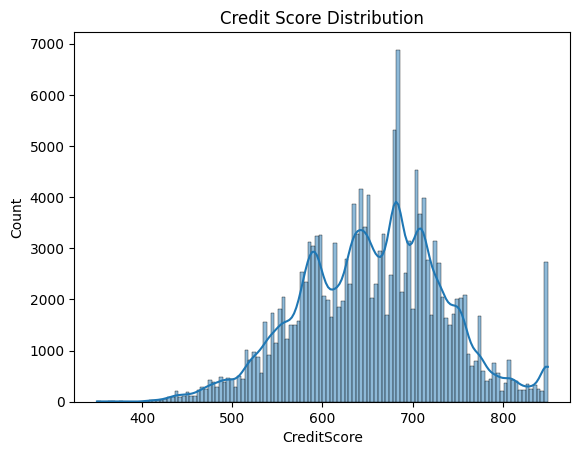

In [15]:
sns.histplot(df_train,x=df_train['CreditScore'],kde=True)
plt.title('Credit Score Distribution')
plt.show()

In [16]:
Gender_exited_group=df_train.groupby(by=['Gender','Exited']).size().reset_index()
Gender_exited_group=Gender_exited_group.rename(columns={0:'count'})
Gender_exited_group['Exited']=Gender_exited_group['Exited'].map({0:'Left',1:'Did not left'})
Gender_exited_group

,Gender,Exited,count
0,Female,Left,51779
1,Female,Did not left,20105
2,Male,Left,78334
3,Male,Did not left,14816


In [17]:
fig=px.bar(Gender_exited_group,x='Exited',y='count',color='Gender',barmode='group',title='Count of Exits by Gender Distribution')
fig.show(render='iframe')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



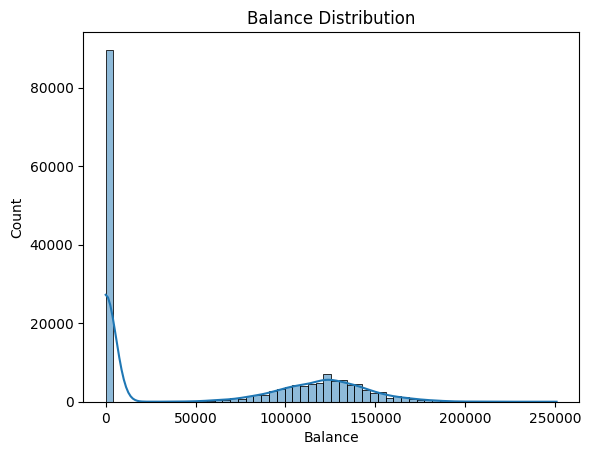

In [18]:
sns.histplot(df_train,x=df_train['Balance'],kde=True)
plt.title('Balance Distribution')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



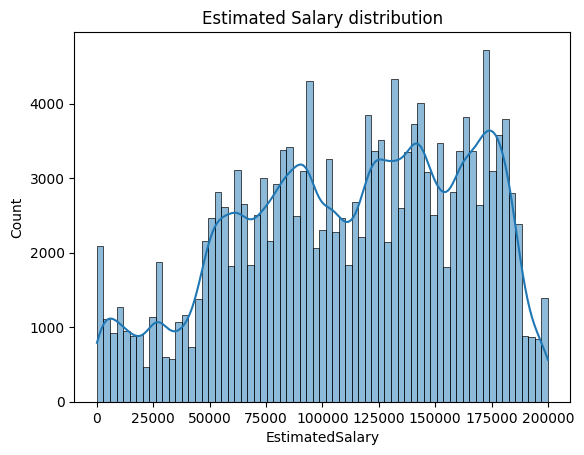

In [19]:
sns.histplot(df_train,x=df_train['EstimatedSalary'],kde=True)
plt.title('Estimated Salary distribution')
plt.show()

In [20]:
df_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


### ***Feature Engineering***

In [21]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [22]:
x=df_train.iloc[:,:-1]
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83
...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03


In [23]:
y=df_train.iloc[:,-1]
y

0         0
1         0
2         0
3         0
4         0
         ..
165029    0
165030    0
165031    0
165032    0
165033    1
Name: Exited, Length: 165034, dtype: int64

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [25]:
transformer=ColumnTransformer(transformers=[
    ('tnf1',StandardScaler(),['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']),
    ('tnf2',OneHotEncoder(),['Geography','Gender']),   
])

In [26]:
x_train=transformer.fit_transform(x_train)
x_train

array([[ 0.2775534 ,  0.32458613,  1.41649004, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.80227227,  0.88829874,  1.41649004, ...,  0.        ,
         0.        ,  1.        ],
       [-1.32158984, -0.35186899, -0.0077698 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.20205808,  0.09910109,  0.70436012, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.35251324,  1.11378378, -0.36383476, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.12763372, -0.35186899, -1.43202963, ...,  0.        ,
         0.        ,  1.        ]])

In [27]:
x_test=transformer.transform(x_test)

### ***Model Building***

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model=LogisticRegression()

In [30]:

model.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_pred=model.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8163722846668888
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     26052
           1       0.63      0.30      0.41      6955

    accuracy                           0.82     33007
   macro avg       0.74      0.63      0.65     33007
weighted avg       0.79      0.82      0.79     33007

Confusion Matrix:
[[24835  1217]
 [ 4844  2111]]


### ***Let's Build ANN model***

In [34]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2024-02-07 17:52:49.223453: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-07 17:52:49.223590: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-07 17:52:49.390476: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [35]:
model=Sequential()
model.add(Dense(40,activation='relu',input_dim=x_train.shape[1]))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [36]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                480       
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32)


Epoch 1/10
4126/4126 [==============================] - 9s 2ms/step - loss: 0.3575 - accuracy: 0.8483
Epoch 2/10
4126/4126 [==============================] - 8s 2ms/step - loss: 0.3440 - accuracy: 0.8549
Epoch 3/10
4126/4126 [==============================] - 8s 2ms/step - loss: 0.3431 - accuracy: 0.8555
Epoch 4/10
4126/4126 [==============================] - 8s 2ms/step - loss: 0.3424 - accuracy: 0.8556
Epoch 5/10
4126/4126 [==============================] - 8s 2ms/step - loss: 0.3421 - accuracy: 0.8557
Epoch 6/10
4126/4126 [==============================] - 8s 2ms/step - loss: 0.3418 - accuracy: 0.8559
Epoch 7/10
4126/4126 [==============================] - 8s 2ms/step - loss: 0.3414 - accuracy: 0.8556
Epoch 8/10
4126/4126 [==============================] - 8s 2ms/step - loss: 0.3412 - accuracy: 0.8559
Epoch 9/10
4126/4126 [==============================] - 8s 2ms/step - loss: 0.3410 - accuracy: 0.8557
Epoch 10/10
4126/4126 [==============================] - 8s 2ms/step - loss: 0.340

In [39]:
val_loss,val_accuracy=model.evaluate(x_test,y_test)
print('val_loss',val_loss,'accuracy',val_accuracy)

1032/1032 [==============================] - 2s 2ms/step - loss: 0.3390 - accuracy: 0.8551
val_loss 0.33896374702453613 accuracy 0.8550610542297363


The similarity between the test accuracy and validation accuracy suggests that our model is not overfitting.

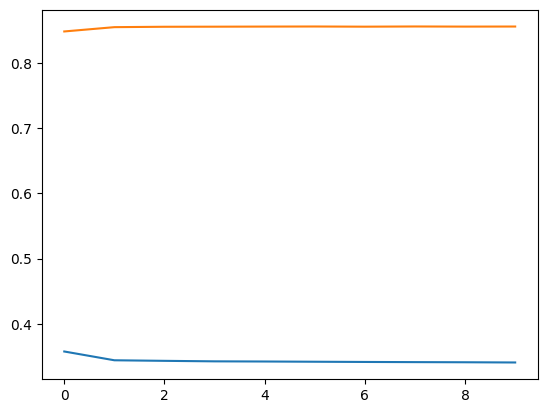

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])


After 2-3 iteration model became almost stable